## Single-Site Spectrum ##

In [205]:
def sspec(v,S):
    wZPL = 2.0
    vPSB = 50.0
    a = 3
    b = 1.0/vPSB
    ZPL = (1.0)/((math.pi*wZPL)*(1 + (v/wZPL)**2))
    PSB = (b**a)*(v**(a-1))*np.exp(-b*v)/math.gamma(a)*(v>0)
    
    return math.exp(-S)*ZPL + (1.0 - math.exp(-S))*PSB
    

## Calculating a Convolution by Discrete Integration ##

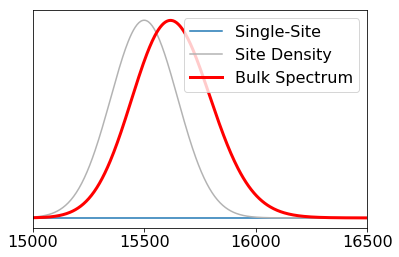

In [220]:
vaxis = np.arange(15000.0, 16500.0, 4)
vo = 15500
sig = 150

pdf = np.exp(-(vaxis-vo)**2/(2.0*sig**2))

plt.figure()
sspecline, = plt.plot(vaxis, 0*vaxis)
pdfline, = plt.plot(vaxis, pdf, color=[0.7,0.7,0.7])
totline, = plt.plot(vaxis, 0*vaxis, 'r', linewidth=3)

plt.legend(['Single-Site', 'Site Density', 'Bulk Spectrum'], fontsize=16)
plt.xlim([15000,16500])
plt.xticks(np.arange(15000,16501, 500), fontsize=16)
plt.yticks([])

S = 2
SpTot = 0*vaxis
for n in range(0,len(vaxis)):
    vZPL = vaxis[n]
    Spn = sspec(vaxis - vZPL,S)
    SpTot += Spn*pdf[n]*4.65
    totline.set_ydata(SpTot)
    sspecline.set_ydata(Spn*pdf[n]*23*2)
    display.display(plt.gcf())
    display.clear_output(wait=True)


## Calculating a Convolution by Random Sampling ##

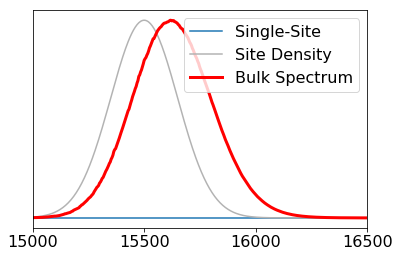

In [219]:
plt.figure()
sspecline, = plt.plot(vaxis, 0*vaxis)
pdfline, = plt.plot(vaxis, pdf, color=[0.7,0.7,0.7])
totline, = plt.plot(vaxis, 0*vaxis, 'r', linewidth=3)

plt.legend(['Single-Site', 'Site Density', 'Bulk Spectrum'], fontsize=16)
plt.xlim([15000,16500])
plt.xticks(np.arange(15000,16501, 500), fontsize=16)
plt.yticks([])


N = 100000
nUpdate = 1
SpTot = 0*vaxis
for n in range(0,N):
    vZPL = np.random.normal(vo,sig,1)
    Spn = sspec(vaxis - vZPL,S)
    SpTot += Spn
    
    if n%nUpdate==0:
        totline.set_ydata(SpTot/np.max(SpTot))
        display.display(plt.gcf())
        display.clear_output(wait=True)
        nUpdate = math.floor(1.2*n + 1)
        #time.sleep(0.01)
    
        



## Calculating a Convolution by Fourier Transform ##

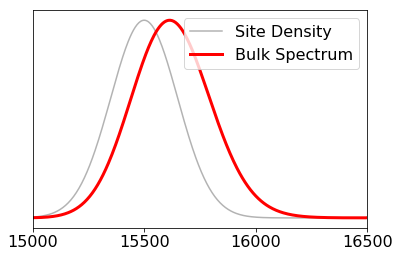

In [218]:
pdf = np.exp(-(vaxis-vo)**2/(2.0*sig**2))

# Generate a singlep-site spectrum centered in the window of interest
SSpec = sspec(vaxis - np.mean(vaxis),S)

# Normalize it
SSpec = SSpec/np.sum(SSpec)

# FFTshift it to peak at the first entry
SSpec = np.fft.fftshift(SSpec)

# Calculate the convolution
TotSpec = np.real(np.fft.ifft(np.fft.fft(pdf)*np.fft.fft(SSpec)))



plt.figure()
pdfline, = plt.plot(vaxis, pdf, color=[0.7,0.7,0.7])
totline, = plt.plot(vaxis, TotSpec/np.max(TotSpec), 'r', linewidth=3)

plt.legend(['Site Density', 'Bulk Spectrum'], fontsize=16)
plt.xlim([15000,16500])
plt.xticks(np.arange(15000,16501, 500), fontsize=16)
plt.yticks([])
plt.show()


## A Hole Burning Spectrum ##

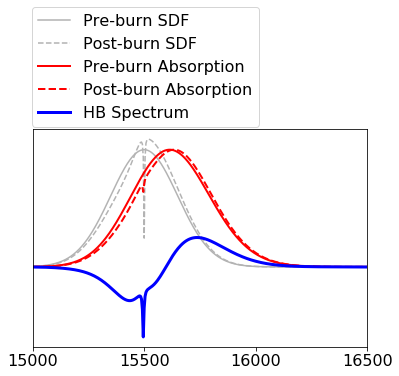

In [298]:
# Generate a singlep-site spectrum centered in the window of interest
SSpec = sspec(vaxis - np.mean(vaxis),S)

# Normalize it
SSpec = SSpec/np.sum(SSpec)

# FFTshift it to peak at the first entry
SSpec = np.fft.fftshift(SSpec)

# Original pdf
pdf = np.exp(-(vaxis-vo)**2/(2.0*sig**2))

ExcProf = sspec(15500-vaxis,S)*40

# Post-burn pdf
pdfBurn = pdf - ExcProf + pdf*(np.sum(ExcProf/np.sum(pdf)))

# Calculate the convolution
PreBurnSpec = np.real(np.fft.ifft(np.fft.fft(pdf)*np.fft.fft(SSpec)))
PostBurnSpec = np.real(np.fft.ifft(np.fft.fft(pdfBurn)*np.fft.fft(SSpec)))

plt.figure()
pdfline, = plt.plot(vaxis, pdf, color=[0.7,0.7,0.7])
pdfline, = plt.plot(vaxis, pdfBurn, '--', color=[0.7,0.7,0.7])
totline, = plt.plot(vaxis, PreBurnSpec/np.max(PreBurnSpec), 'r', linewidth=2)
totline, = plt.plot(vaxis, PostBurnSpec/np.max(PostBurnSpec), 'r--', linewidth=2)
plt.plot(vaxis, (PostBurnSpec - PreBurnSpec)*5, 'b', linewidth=3)

plt.legend(['Pre-burn SDF', 'Post-burn SDF', 'Pre-burn Absorption', 'Post-burn Absorption', 'HB Spectrum'], fontsize=16, bbox_to_anchor=(0.7, 1.6))
plt.xlim([15000,16500])
plt.xticks(np.arange(15000,16501, 500), fontsize=16)
plt.yticks([])

plt.show()
